# (4강-실습-2) 정형데이터와 Seaborn II

## 0. 들어가기 앞서

- **실습 개요**: Python 시각화 라이브러리인 seaborn 활용
- **실습 진행 목적 및 배경**:
  - 데이터분석의 핵심은 분포, 분포의 차이, 관계를 통한 인사이트 도출
  - matplotlib을 보다 통계적인 관점으로 살펴볼 수 있게 만든 seaborn을 사용하여 데이터 시각화 및 EDA를 학습한다.
- **실습 수행으로 얻어갈 수 있는 역량**:
  - seaborn을 사용하여 원하는 분포, 분포의 차이, 관계 등을 관찰할 수 있다.
- **데이터셋 개요 및 저작권 정보**:
  - [Student Performance Dataset](http://roycekimmons.com/tools/generated_data/exams) ([Kaggle Ver.](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)) | CC0 1.0 Universal Public Domain Dedication
  - [Iris Dataset](https://archive.ics.uci.edu/dataset/53/iris) | Creative Commons Attribution 4.0 International (CC BY 4.0) license.
- **실습 핵심 내용**
  - Seaborn에서 제공하는 Figure-Level API

이번에는 여러 차트를 사용하여 정보량을 높이는 방법에 대해 다뤄보도록 하겠습니다.

이전에는 ax에 하나를 그리는 방법이었다면, 이제는 Figure-Level로 전체적인 시각화를 그리는 API입니다.

- jointplot
- pairplot 
- FacetGrid

In [1]:
!kaggle datasets download uciml/iris

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0%|                                               | 0.00/3.60k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.60k/3.60k [00:00<00:00, 1.16MB/s]


In [25]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

student = pd.read_csv('./StudentsPerformance.csv')
iris = pd.read_csv('./Iris.csv')

## 1. Joint Plot

이미 distribution api에서 결합확률 분포를 시각화하는 다양한 함수를 살펴보았습니다.

joint plot은 그런 2개 피처의 결합확률 분포와 함께 각각의 분포도 살필 수 있는 시각화를 제공합니다.

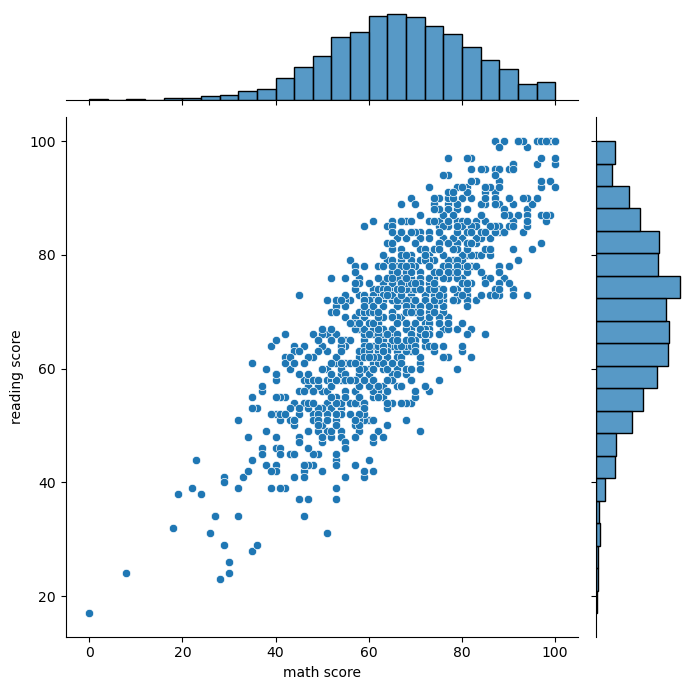

In [3]:
sns.jointplot(x='math score', y='reading score',data=student,
             height=7)

hue를 사용하여 구분할 수 있습니다.

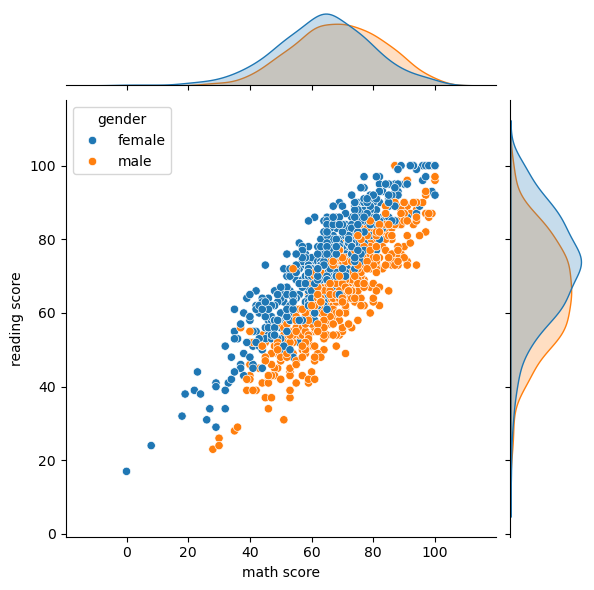

In [4]:
sns.jointplot(x='math score', y='reading score',data=student,
              hue='gender'
             )

다양한 종류로 분포를 확인할 수 있습니다.

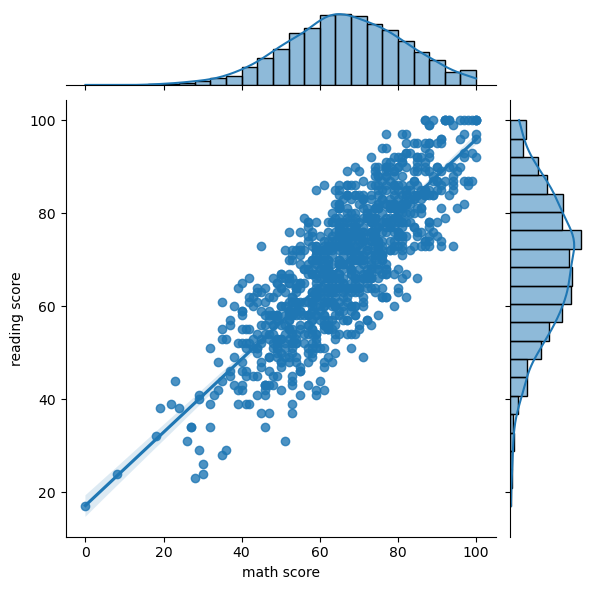

In [5]:
sns.jointplot(x='math score', y='reading score',data=student,
#               hue='gender', 
              kind='reg', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }, 
#               fill=True
             )

## 2. Pair Plot

데이터셋의 pair-wise 관계를 시각화하는 함수입니다.

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


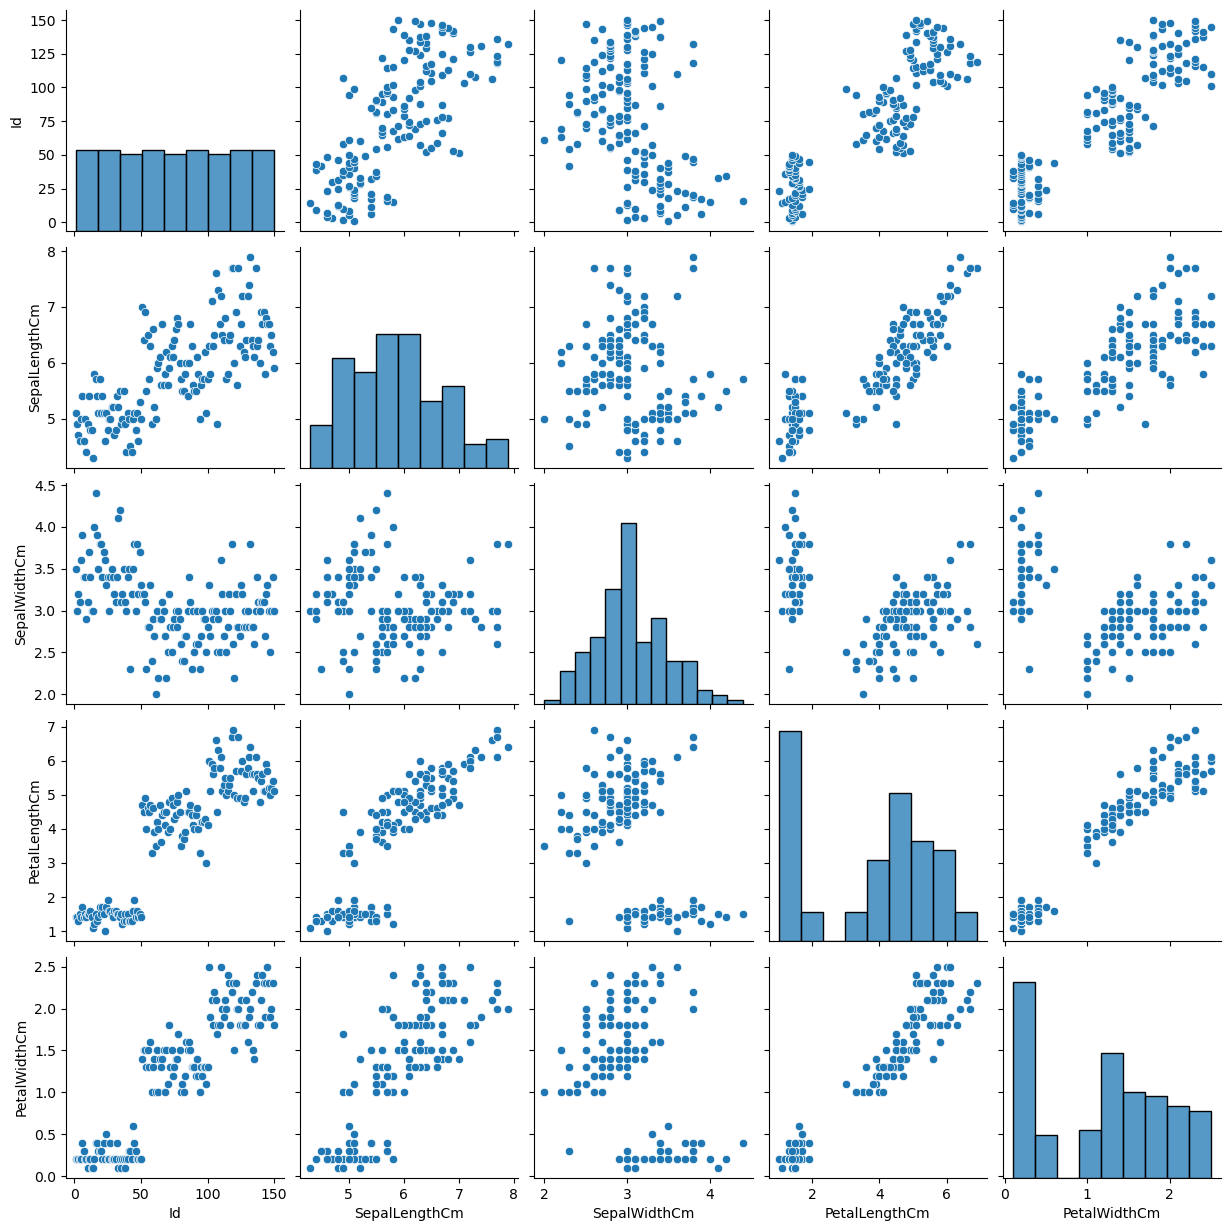

In [7]:
sns.pairplot(data=iris)

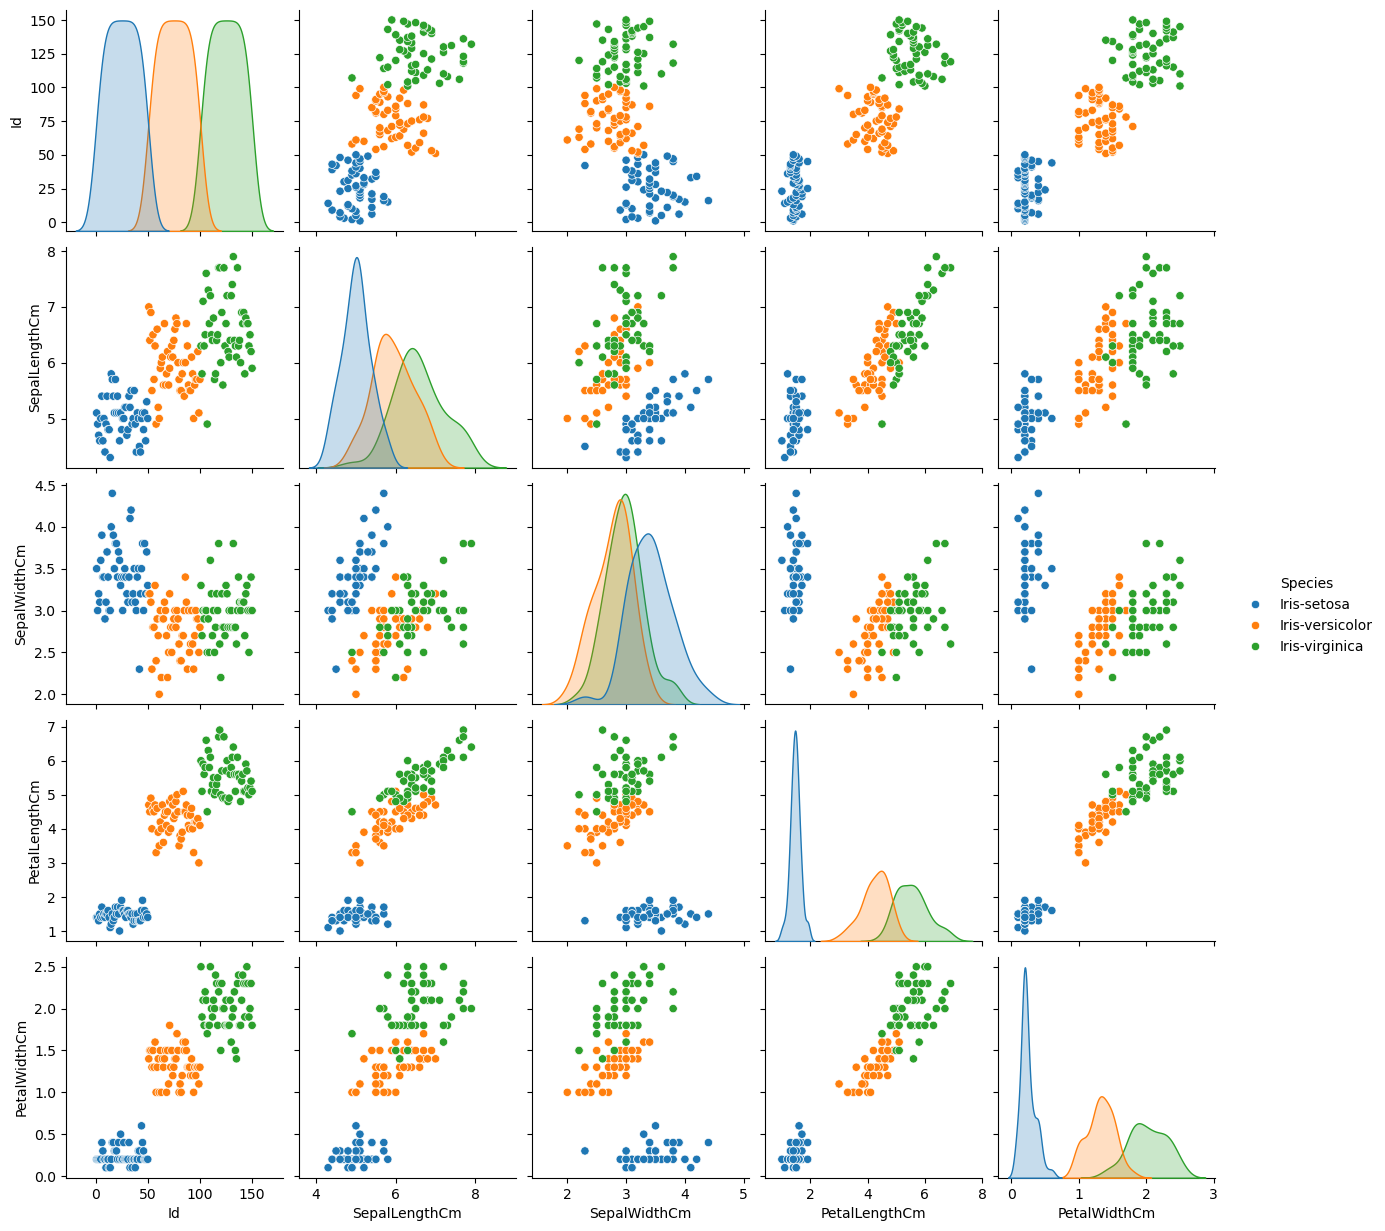

In [8]:
sns.pairplot(data=iris, hue='Species')

2가지 변수를 사용하여 시각화 방법을 조정할 수 있습니다.

`kind`는 전체 서브플롯, `diag_kind`는 대각 서브플롯을 조정합니다.

- `kind` : {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
- `diag_kind` : {‘auto’, ‘hist’, ‘kde’, None}

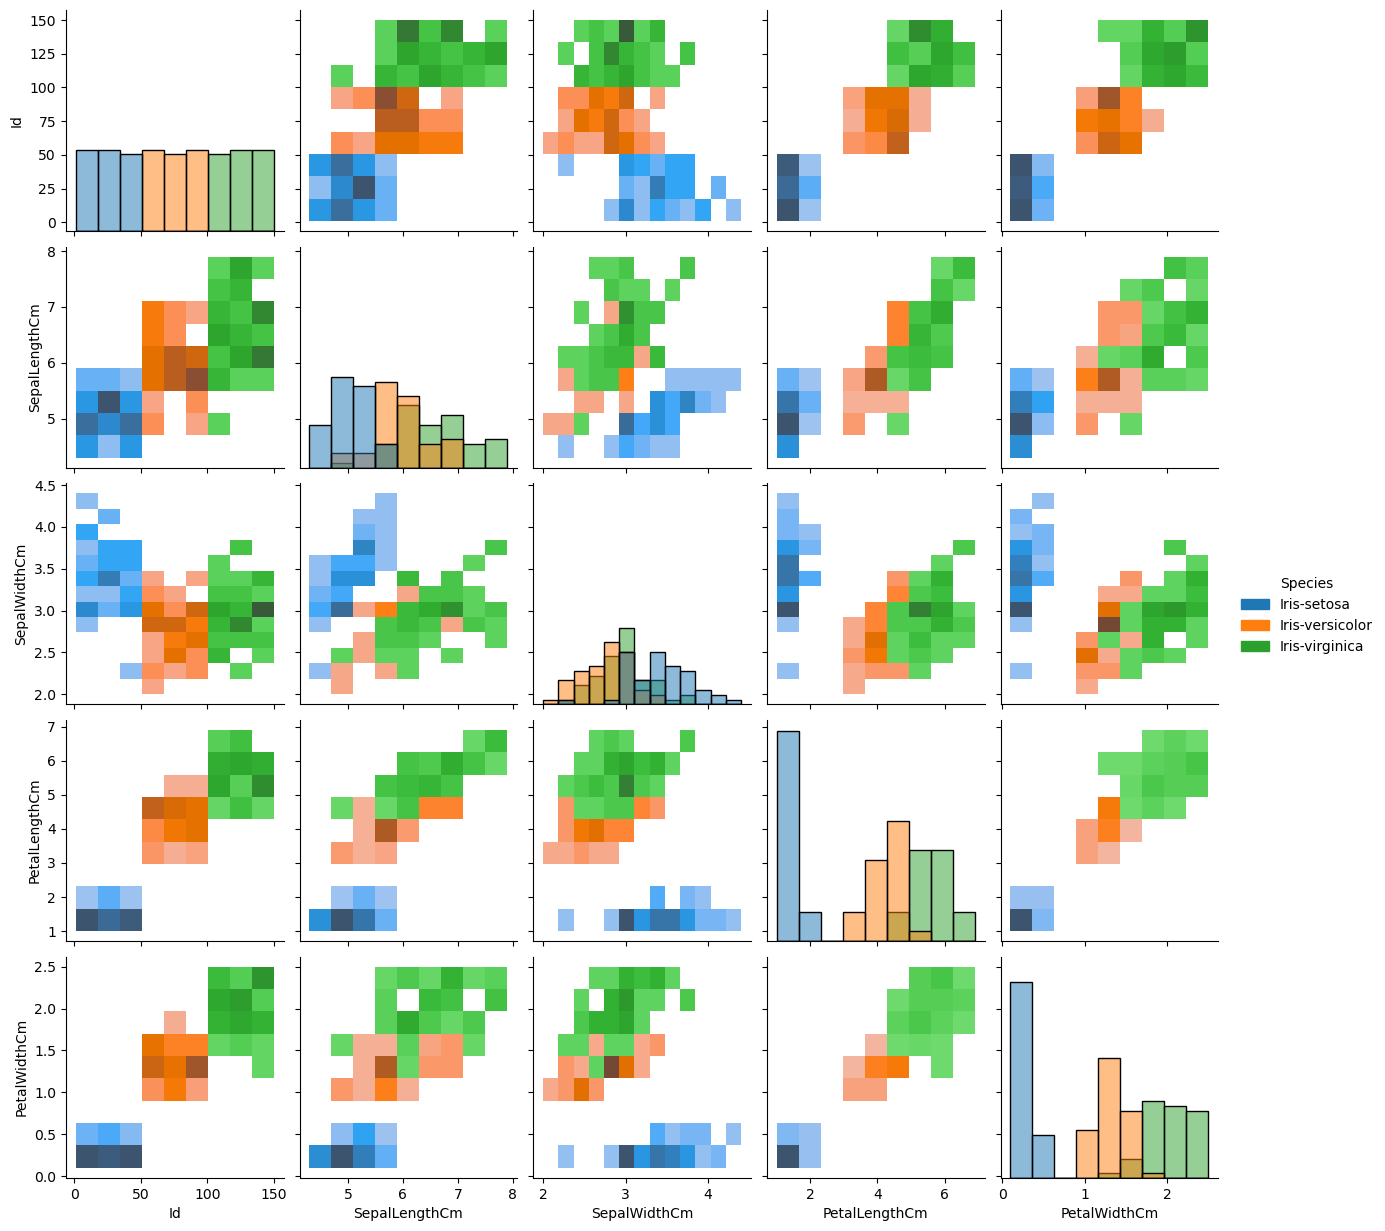

In [9]:
sns.pairplot(data=iris, hue='Species', kind='hist')

기본적으로 pairwise로 하게 되면 모양이 대각선을 기준으로 대칭입니다. 상삼각행렬의 plot은 보지 않는 방법도 있습니다.

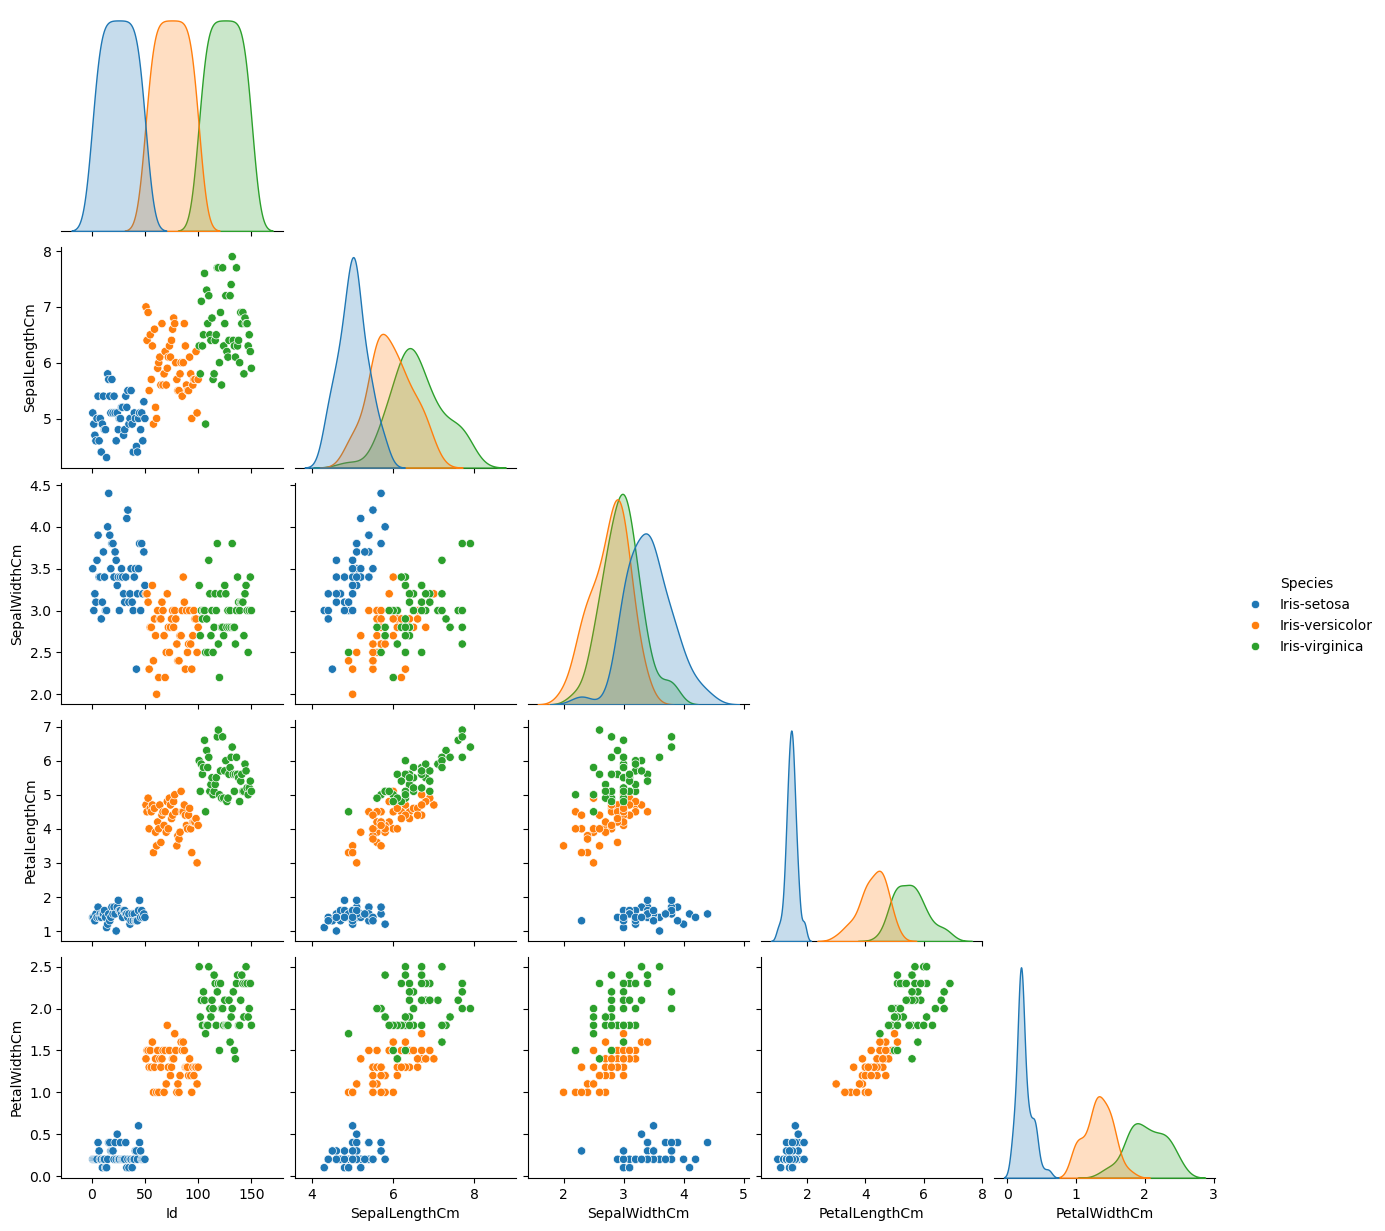

In [10]:
sns.pairplot(data=iris, hue='Species', corner=True)

## 3. Facet Grid 사용하기

pairplot과 같이 다중 패널을 사용하는 시각화를 의미합니다.

다만 pairplot은 feature-feature 사이를 살폈다면, Facet Grid는 feature-feature 뿐만이 아니라 feature's category-feature's category의 관계도 살펴볼 수 있습니다.

단일 시각화도 가능하지만, 여기서는 최대한 여러 pair를 보며 관계를 살피는 것을 위주로 보면 좋습니다.

총 4개의 큰 함수가 Facet Grid를 기반으로 만들어졌습니다.

- `catplot` : Categorical 
- `displot` : Distribution
- `relplot` : Relational
- `lmplot` : Regression


### 3-1. catplot 

이미 수 많은 방법을 앞에서 살펴보았기에 각각에 대한 설명은 생략하도록 하겠습니다.
`catplot`은 다음 방법론을 사용할 수 있습니다.

- Categorical scatterplots:
    - `stripplot()` (with `kind="strip"`; the default)
    - `swarmplot()` (with `kind="swarm"`)

- Categorical distribution plots:
    - `boxplot()` (with `kind="box"`)
    - `violinplot()` (with `kind="violin"`)
    - `boxenplot()` (with `kind="boxen"`)

- Categorical estimate plots:
    - `pointplot()` (with `kind="point"`)
    - `barplot()` (with `kind="bar"`)
    - `countplot()` (with `kind="count"`)



In [11]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


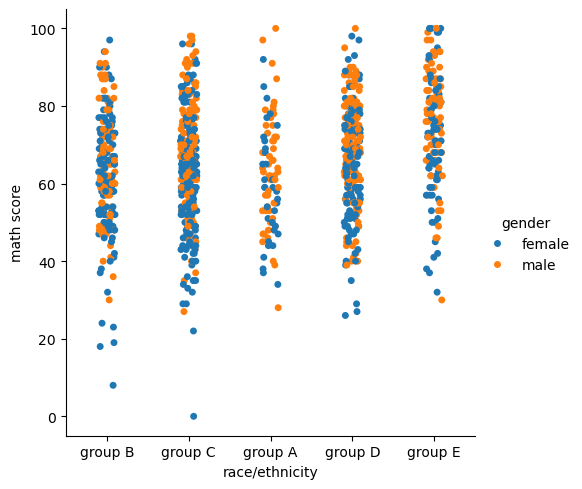

In [12]:
sns.catplot(x="race/ethnicity", y="math score", hue="gender", data=student)

기본은 `stripplot`이고, 다른 플롯도 사용할 수 있습니다.

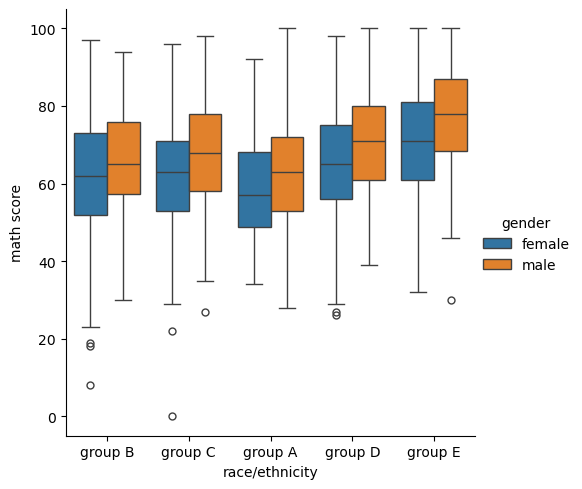

In [13]:
sns.catplot(x="race/ethnicity", y="math score", hue="gender", data=student,
            kind='box'
           )

FacetGrid는 행(Row)과 열(Column)을 조정하는 것이 중요합니다.

각 행과 열의 category를 기반으로 해당 그래프의 개수가 조정됩니다.

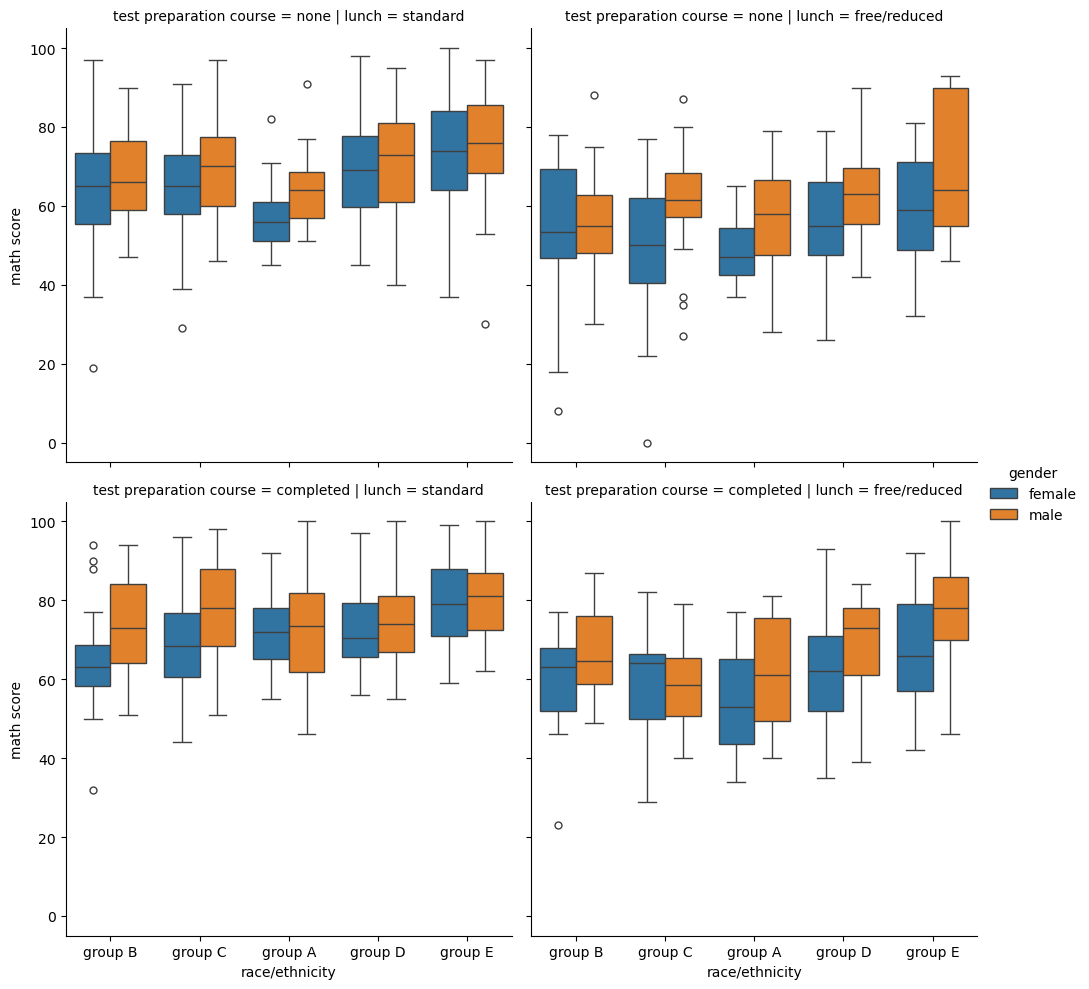

In [14]:
sns.catplot(x="race/ethnicity", y="math score", hue="gender", data=student,
            kind='box', col='lunch', row='test preparation course'
           )

### 3-2. displot

`displot`은 다음 방법론을 사용할 수 있습니다.

- `histplot()` (with `kind="hist"`; the default)
- `kdeplot()` (with `kind="kde"`)
- `ecdfplot()` (with `kind="ecdf"`; univariate-only)

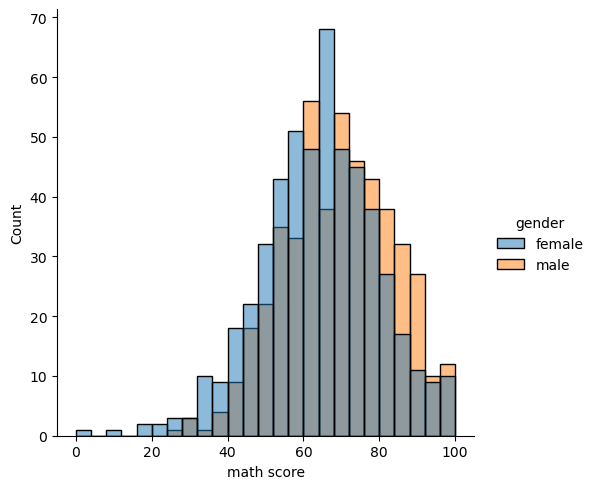

In [15]:
sns.displot(x="math score", hue="gender", data=student)

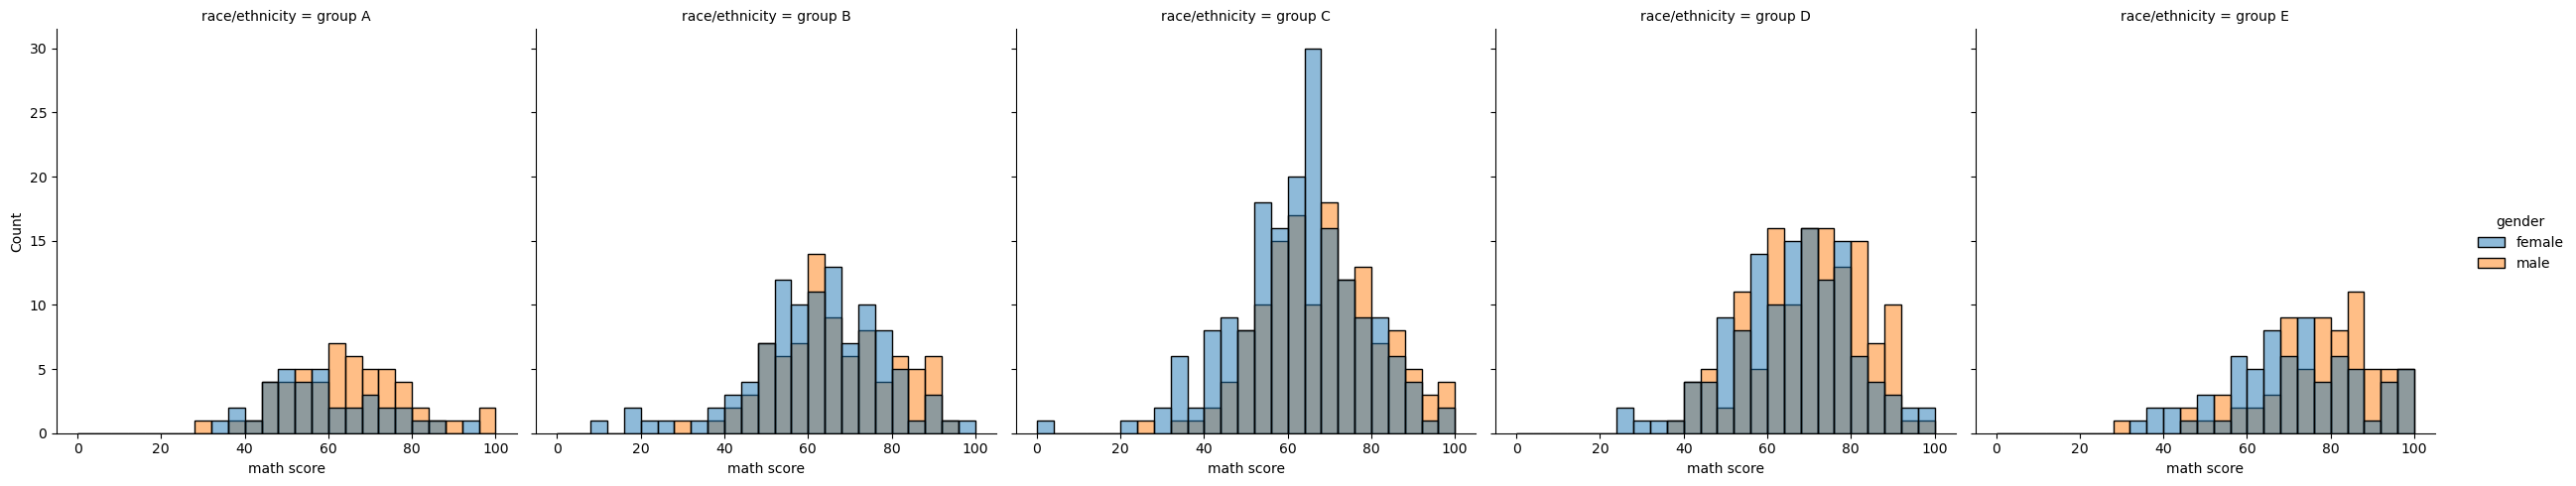

In [16]:
sns.displot(x="math score", hue="gender", data=student,
           col='race/ethnicity', # kind='kde', fill=True
            col_order=sorted(student['race/ethnicity'].unique())
           )

### 3-3. relplot

`relplot`은 다음 방법론을 사용할 수 있습니다.

- `scatterplot()` (with `kind="scatter"`; the default)
- `lineplot()` (with `kind="line"`)

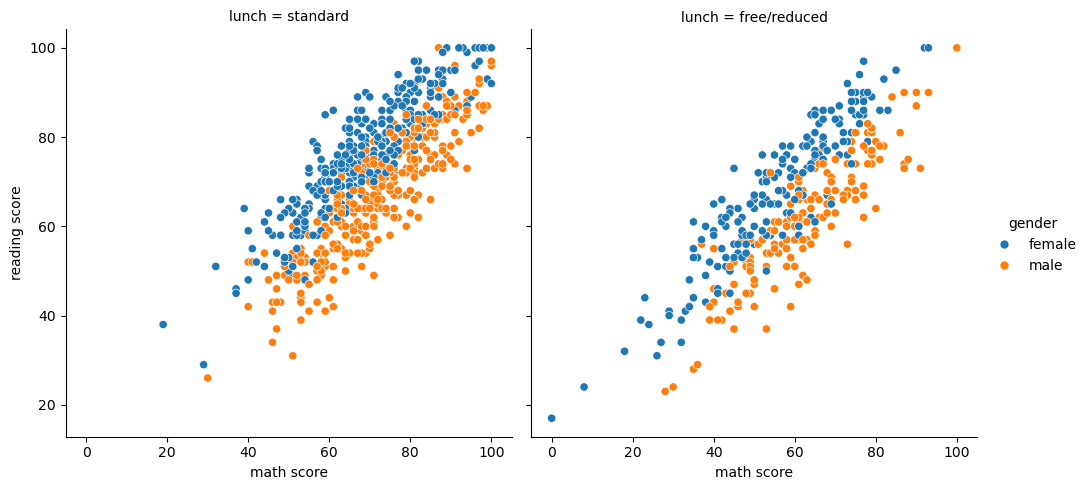

In [17]:
sns.relplot(x="math score", y='reading score', hue="gender", data=student,
           col='lunch')

### 3-4. lmplot

`lmplot`은 다음 방법론을 사용할 수 있습니다.

- `regplot()`

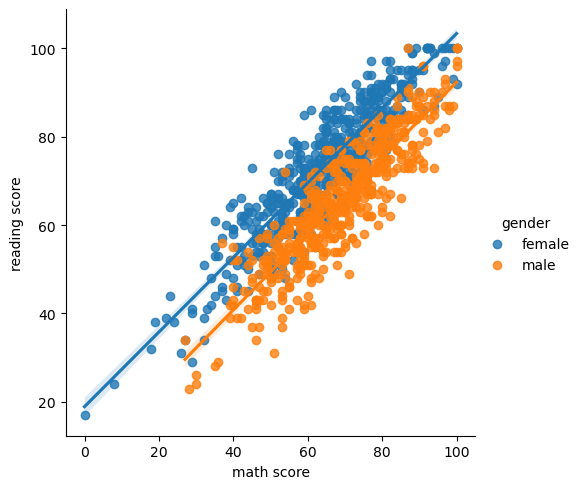

In [18]:
sns.lmplot(x="math score", y='reading score', hue="gender", data=student)

### **콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

